# Tema 1 - Invatare Automata 2024

In [ ]:
getDependencies = False #@param ["False", "True"] {type:"raw"}


In [ ]:
if getDependencies:
    !pip install seaborn
    !pip install scipy
    !pip install scikit-learn
    !pip install category_encoders
    from google.colab import drive
    drive.mount('/content/drive')

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import traceback
import time

from scipy.stats import pointbiserialr, chi2_contingency, f_oneway
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Citim setul de date

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Tema1_ML"
df = pd.read_csv(f"{DATASET_PATH}/date_tema_1_iaut_2024.csv")

# 3.1. Explorarea Datelor (Exploratory Data Analysis)

In [ ]:
num_examples = df.shape[0]
print("Numărul de exemple din setul de date:", num_examples)

Numărul de exemple din setul de date: 1921


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Transportation                1921 non-null   object
 1   Regular_fiber_diet            1921 non-null   object
 2   Diagnostic_in_family_history  1921 non-null   object
 3   High_calorie_diet             1921 non-null   object
 4   Sedentary_hours_daily         1921 non-null   object
 5   Age                           1921 non-null   object
 6   Alcohol                       1921 non-null   object
 7   Est_avg_calorie_intake        1921 non-null   int64 
 8   Main_meals_daily              1921 non-null   object
 9   Snacks                        1921 non-null   object
 10  Height                        1921 non-null   object
 11  Smoker                        1921 non-null   object
 12  Water_daily                   1921 non-null   object
 13  Calorie_monitoring

Observam un esantion mic de date

In [ ]:
print(df.head());

          Transportation Regular_fiber_diet Diagnostic_in_family_history  \
0  Public_Transportation                  2                          yes   
1  Public_Transportation                  3                          yes   
2  Public_Transportation                  2                          yes   
3                Walking                  3                           no   
4  Public_Transportation                  2                           no   

  High_calorie_diet Sedentary_hours_daily Age     Alcohol  \
0                no                  3,73  21          no   
1                no                  2,92  21   Sometimes   
2                no                  3,85  23  Frequently   
3                no                  3,01  27  Frequently   
4                no                  2,73  22   Sometimes   

   Est_avg_calorie_intake Main_meals_daily     Snacks Height Smoker  \
0                    2474                3  Sometimes   1,62     no   
1                    2429         

Convertim atributele categorice numerice din format obiect (string) in format numeric

In [ ]:
def convert_categorical_to_numeric(df):
    numeric_categorical_attributes = []

    for column in df.columns:
        # Verificăm dacă tipul de date al coloanei nu este deja numeric
        if df[column].dtype == 'object':
            # Convertim doar coloana curentă în tipul de date 'str'
            df[column] = df[column].astype(str)
            try:
                df[column] = df[column].str.replace(',', '.').astype(float)
                numeric_categorical_attributes.append(column)
            except ValueError:
                pass
    print("Atributele categorice convertite cu succes în numere:")
    print(numeric_categorical_attributes)

# Utilizare
convert_categorical_to_numeric(df)

Atributele categorice convertite cu succes în numere:
['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level']


Descoperim atributele numerice si categorice

In [ ]:
# Identificarea atributelor numerice și categorice
numeric_attributes = df.select_dtypes(include=np.number).columns.tolist()
categorical_attributes = df.select_dtypes(exclude=np.number).columns.tolist()

# Afișarea atributele numerice și categorice
print("Atribute numerice:")
print(numeric_attributes)
print("\nAtribute categorice:")
print(categorical_attributes)

Atribute numerice:
['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level', 'Technology_time_use']

Atribute categorice:
['Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet', 'Alcohol', 'Snacks', 'Smoker', 'Calorie_monitoring', 'Gender', 'Diagnostic']


Vizualizarea valorilor posibile pentru fiecare atribut numeric

In [ ]:
def unique_values(column, dataframe):
    print(f"Valori unice pentru {column}, sortate:")
    print(dataframe[column].value_counts().sort_index())
    print(f"Total raspunsuri posibile: {dataframe[column].nunique()}")
    print()

# Afișarea valorilor unice pentru fiecare atribut numeric, sortate
for column in numeric_attributes:
    unique_values(column, df)

Valori unice pentru Regular_fiber_diet, sortate:
Regular_fiber_diet
1.000000        28
1.003566         1
1.005578         1
1.008760         1
1.031149         1
              ... 
2.997524         1
2.997951         1
2.998441         1
3.000000       597
2739.000000      1
Name: count, Length: 733, dtype: int64
Total raspunsuri posibile: 733

Valori unice pentru Sedentary_hours_daily, sortate:
Sedentary_hours_daily
2.21      10
2.22       8
2.23      10
2.24       7
2.25       7
          ..
4.64       2
4.65       3
4.66       4
4.67       1
956.58     1
Name: count, Length: 239, dtype: int64
Total raspunsuri posibile: 239

Valori unice pentru Age, sortate:
Age
15.000000       1
16.000000       7
16.093234       1
16.129279       1
16.172992       1
               ..
55.246250       1
56.000000       1
61.000000       1
19627.000000    1
19685.000000    1
Name: count, Length: 1282, dtype: int64
Total raspunsuri posibile: 1282

Valori unice pentru Est_avg_calorie_intake, sortate:
Es

Calculam p-value pentru atributele numerice folosind ANOVA (Analiza Varianței)

In [ ]:
def calculate_anova_p_values(numeric_columns, target_column, dataframe):
    numeric_p_values = {}
    for column in numeric_columns:
        # Calculăm p-value folosind ANOVA
        p_value = f_oneway(*[dataframe[dataframe[target_column] == label][column] for label in dataframe[target_column].unique()])[1]
        numeric_p_values[column] = p_value
    return numeric_p_values

# Utilizare
target_column = "Diagnostic"
numeric_p_values = calculate_anova_p_values(numeric_attributes, target_column, df)

p_value_threshold = 0.05

# Listă pentru atributele numerice relevante
numeric_features = []

# Sortăm p-values-urile în ordine crescătoare
sorted_numeric_p_values = sorted(numeric_p_values.items(), key=lambda x: x[1])

print(f"Atributele cu p-value < {p_value_threshold}:")
for attribute, p_value in sorted_numeric_p_values:
    if p_value < p_value_threshold:
        numeric_features.append(attribute)
        print(f"{attribute}: {p_value}")

print("\n------------------------------------------------------")
print(f"Atributele cu p-value >= {p_value_threshold}:")
for attribute, p_value in sorted_numeric_p_values:
    if p_value >= p_value_threshold:
        print(f"{attribute}: {p_value}")

print("\nLista de atribute numerice relevante:")
print(numeric_features)

Atributele cu p-value < 0.05:
Main_meals_daily: 1.0439849937990176e-28
Physical_activity_level: 4.1385763108655385e-17
Water_daily: 9.290933849587134e-17
Age: 0.04691944484302147

------------------------------------------------------
Atributele cu p-value >= 0.05:
Est_avg_calorie_intake: 0.07135651633628821
Weight: 0.2680734718334284
Technology_time_use: 0.3965841022223923
Sedentary_hours_daily: 0.40455226509910797
Regular_fiber_diet: 0.41415163346177447
Height: 0.5819402028950371

Lista de atribute numerice relevante:
['Main_meals_daily', 'Physical_activity_level', 'Water_daily', 'Age']


Identificarea valorilor NaN mascate (exemplu: -1 pt atribute strict pozitive)

In [ ]:
def discover_negative_nan(df, column_name):
    df.loc[df[column_name] <= 0, column_name] = np.nan
    num_nan_values = df[column_name].isna().sum()
    print(f"Numărul de valori NaN pentru coloana '{column_name}' este: {num_nan_values}")

# Utilizare
discover_negative_nan(df, 'Weight')

Numărul de valori NaN pentru coloana 'Weight' este: 190


Verificam pentru fiecare atribut cate exemple au valori nule (NaN)

In [ ]:
# Calculăm numărul de valori NaN pentru fiecare atribut în parte
nan_counts = df.isna().sum()

# Afișăm numărul de valori NaN pentru fiecare atribut
print("Numărul de valori NaN pentru fiecare atribut:")
print(nan_counts)


Numărul de valori NaN pentru fiecare atribut:
Transportation                    0
Regular_fiber_diet                0
Diagnostic_in_family_history      0
High_calorie_diet                 0
Sedentary_hours_daily             0
Age                               0
Alcohol                           0
Est_avg_calorie_intake            0
Main_meals_daily                  0
Snacks                            0
Height                            0
Smoker                            0
Water_daily                       0
Calorie_monitoring                0
Weight                          190
Physical_activity_level           0
Technology_time_use               0
Gender                            0
Diagnostic                        0
dtype: int64


Eliminam outlierii

In [ ]:
def eliminate_outliers(df, columns, coeficient_outliers, outliers_percent_threshold):
    outliers_info = {}

    for column in columns:
        std_dev = df[column].std()
        coeficient = coeficient_outliers

        outlier_limit = coeficient * std_dev
        outliers = df[df[column] > outlier_limit][column]
        outliers_count = len(outliers)
        total_count = len(df)
        percent = (outliers_count / total_count) * 100

        if percent > outliers_percent_threshold:
            while percent > outliers_percent_threshold:
                coeficient += 1
                outlier_limit = coeficient * std_dev
                outliers = df[df[column] > outlier_limit][column]
                outliers_count = len(outliers)
                percent = (outliers_count / total_count) * 100

        # Modificăm data frame-ul și eliminăm outlierii
        outliers_info[column] = {
            'outliers': outliers.tolist(),
            'std_dev_times_outliers': (outliers - std_dev).tolist(),
            'outlier_limit': outlier_limit
        }
        df = df[df[column] <= outlier_limit]

    for column, info in outliers_info.items():
        print(f"Outlieri pentru coloana '{column}': {info['outliers']}")
        print(f"Diferența față de std dev pentru outlieri: {info['std_dev_times_outliers']}")
        print(f"Limita pentru coloana '{column}' este valoarea {info['outlier_limit']}\n")

    return df

Aplicam eliminarea valorilor extreme (Outliers) doar pentru atributele numerice relevante (features)

In [ ]:
OUTLIERS_PERCENT = 1 # Procentul maxim de Outliers admis din total
COEFICIENT_OUTLIERS = 3 # De la ce valoare in sus (COEFICIENT_OUTLIERS * std_dev) consideram un numar ca fiind Outlier

df = eliminate_outliers(df, numeric_features, COEFICIENT_OUTLIERS, OUTLIERS_PERCENT)

Outlieri pentru coloana 'Main_meals_daily': []
Diferența față de std dev pentru outlieri: []
Limita pentru coloana 'Main_meals_daily' este valoarea 4.675074334107315

Outlieri pentru coloana 'Physical_activity_level': []
Diferența față de std dev pentru outlieri: []
Limita pentru coloana 'Physical_activity_level' este valoarea 3.4221025699209124

Outlieri pentru coloana 'Water_daily': []
Diferența față de std dev pentru outlieri: []
Limita pentru coloana 'Water_daily' este valoarea 3.0551710222578725

Outlieri pentru coloana 'Age': [19627.0, 19685.0]
Diferența față de std dev pentru outlieri: [18993.688162923285, 19051.688162923285]
Limita pentru coloana 'Age' este valoarea 1899.9355112301407



Calculam p-value pentru atributele numerice folosind Testul Chi-Squared

In [ ]:
def calculate_chi_squared_p_values(categorical_columns, target_column, dataframe):
    categorical_p_values = {}
    for col in categorical_columns:
        # Nu adugam si targetul in lista de categorical_
        if col != target_column:
          # Construim tabloul de contingenta intre atributul categoric și atributul țintă
          contingency_table = pd.crosstab(dataframe[col], dataframe[target_column])

          # Calculam valoarea p folosind testul χ²
          chi2, p_value, _, _ = chi2_contingency(contingency_table)
          categorical_p_values[col] = p_value

    return categorical_p_values

In [ ]:
# Utilizare
target_column = "Diagnostic"
categorical_p_values = calculate_chi_squared_p_values(categorical_attributes, target_column, df)

p_value_threshold = 0.05

# Listă pentru atributele categorice relevante
categorical_features = []

# Sortăm p-values-urile în ordine crescătoare
sorted_categorical_p_values = sorted(categorical_p_values.items(), key=lambda x: x[1])

print(f"Atributele categorice cu p-value < {p_value_threshold}:")
for attribute, p_value in sorted_categorical_p_values:
    if p_value < p_value_threshold:
        categorical_features.append(attribute)
        print(f"{attribute}: {p_value}")

print("\n------------------------------------------------------")
print(f"Atributele categorice cu p-value >= {p_value_threshold}:")
for attribute, p_value in sorted_categorical_p_values:
    if p_value >= p_value_threshold:
        print(f"{attribute}: {p_value}")

print("\nLista de atribute categorice relevante:")
print(categorical_features)

Atributele categorice cu p-value < 0.05:
Snacks: 2.363507857062593e-138
Gender: 3.7389609161985087e-125
Diagnostic_in_family_history: 5.988839640471714e-119
Alcohol: 9.612007227696994e-56
Transportation: 1.304031832484721e-44
High_calorie_diet: 3.992374842310777e-42
Calorie_monitoring: 9.766290734496677e-22
Smoker: 3.52262992745387e-05

------------------------------------------------------
Atributele categorice cu p-value >= 0.05:

Lista de atribute categorice relevante:
['Snacks', 'Gender', 'Diagnostic_in_family_history', 'Alcohol', 'Transportation', 'High_calorie_diet', 'Calorie_monitoring', 'Smoker']


#### Encoding (Translatarea datelor categorice in valori numerice)

Vizualizarea valorilor posibile pentru fiecare atribut categoric

In [ ]:
# Afișarea valorilor unice pentru fiecare atribut categoric
for column in categorical_attributes:
    unique_values(column, df)

Valori unice pentru Transportation, sortate:
Transportation
Automobile                423
Bike                        7
Motorbike                  11
Public_Transportation    1425
Walking                    53
Name: count, dtype: int64
Total raspunsuri posibile: 5

Valori unice pentru Diagnostic_in_family_history, sortate:
Diagnostic_in_family_history
no      348
yes    1571
Name: count, dtype: int64
Total raspunsuri posibile: 2

Valori unice pentru High_calorie_diet, sortate:
High_calorie_diet
no      224
yes    1695
Name: count, dtype: int64
Total raspunsuri posibile: 2

Valori unice pentru Alcohol, sortate:
Alcohol
Always           1
Frequently      66
Sometimes     1267
no             585
Name: count, dtype: int64
Total raspunsuri posibile: 4

Valori unice pentru Snacks, sortate:
Snacks
Always          48
Frequently     221
Sometimes     1607
no              43
Name: count, dtype: int64
Total raspunsuri posibile: 4

Valori unice pentru Smoker, sortate:
Smoker
no     1879
yes      4

Definim functiile pentru diferite metode de encoding

In [ ]:
def one_hot_encode(df_categorical):
    # Inițializăm encoder-ul
    onehot_encoder = OneHotEncoder(sparse_output=False)

    # Aplicăm One-Hot Encoding
    onehot_encoded = onehot_encoder.fit_transform(df_categorical)

    # Transformăm rezultatul înapoi într-un DataFrame
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(df_categorical.columns))

    return onehot_df

def label_encode(df_categorical):
    # Inițializăm encoder-ul
    label_encoder = LabelEncoder()

    # Aplicăm Label Encoding pe fiecare coloană
    label_encoded_df = df_categorical.apply(label_encoder.fit_transform)

    return label_encoded_df

def binary_encode(df_categorical):
    # Inițializăm encoder-ul
    binary_encoder = ce.BinaryEncoder(cols=df_categorical.columns.tolist())

    # Aplicăm Binary Encoding
    binary_encoded_df = binary_encoder.fit_transform(df_categorical)

    return binary_encoded_df

def ordinal_encode(df_categorical):
    # Inițializăm encoder-ul
    ordinal_encoder = ce.OrdinalEncoder()

    # Aplicăm Ordinal Encoding
    ordinal_encoded_df = ordinal_encoder.fit_transform(df_categorical)

    return ordinal_encoded_df

def target_encode(df_categorical, target_column):
    # Inițializăm encoder-ul
    target_encoder = ce.TargetEncoder()

    # Aplicăm Target Encoding
    target_encoded_df = target_encoder.fit_transform(df_categorical, target_column)

    return target_encoded_df

Folosim one_hot_encode ca exemplu

In [ ]:
df_encoded = one_hot_encode(df[categorical_attributes])
print(df_encoded.head())

   Transportation_Automobile  Transportation_Bike  Transportation_Motorbike  \
0                        0.0                  0.0                       0.0   
1                        0.0                  0.0                       0.0   
2                        0.0                  0.0                       0.0   
3                        0.0                  0.0                       0.0   
4                        0.0                  0.0                       0.0   

   Transportation_Public_Transportation  Transportation_Walking  \
0                                   1.0                     0.0   
1                                   1.0                     0.0   
2                                   1.0                     0.0   
3                                   0.0                     1.0   
4                                   1.0                     0.0   

   Diagnostic_in_family_history_no  Diagnostic_in_family_history_yes  \
0                              0.0                

Cream setul de features, in urma prelucrarilor de date

In [ ]:
features = numeric_features + df_encoded.columns.tolist()
print(features)

# Concatenăm DataFrame-urile df și df_encoded pe axa coloanelor (axis=1)
df = pd.concat([df, df_encoded], axis=1)

['Main_meals_daily', 'Physical_activity_level', 'Water_daily', 'Age', 'Transportation_Automobile', 'Transportation_Bike', 'Transportation_Motorbike', 'Transportation_Public_Transportation', 'Transportation_Walking', 'Diagnostic_in_family_history_no', 'Diagnostic_in_family_history_yes', 'High_calorie_diet_no', 'High_calorie_diet_yes', 'Alcohol_Always', 'Alcohol_Frequently', 'Alcohol_Sometimes', 'Alcohol_no', 'Snacks_Always', 'Snacks_Frequently', 'Snacks_Sometimes', 'Snacks_no', 'Smoker_no', 'Smoker_yes', 'Calorie_monitoring_no', 'Calorie_monitoring_yes', 'Gender_Female', 'Gender_Male', 'Diagnostic_D0', 'Diagnostic_D1', 'Diagnostic_D2', 'Diagnostic_D3', 'Diagnostic_D4', 'Diagnostic_D5', 'Diagnostic_D6']


In [ ]:
num_examples = df.shape[0]
print("Numărul de exemple din setul de date:", num_examples)

Numărul de exemple din setul de date: 1921


Vizualizam metricile de referinta

In [ ]:
# Calculăm metricile de interes pentru fiecare atribut în parte
metrics = df.describe()
print(metrics)

       Regular_fiber_diet  Sedentary_hours_daily          Age  \
count         1919.000000            1919.000000  1919.000000   
mean             3.846266               3.694033    24.353520   
std             62.472149              21.771171     6.409236   
min              1.000000               2.210000    15.000000   
25%              2.000000               2.770000    19.967065   
50%              2.387426               3.130000    22.829681   
75%              3.000000               3.640000    26.000000   
max           2739.000000             956.580000    61.000000   

       Est_avg_calorie_intake  Main_meals_daily       Height  Water_daily  \
count             1919.000000       1919.000000  1919.000000  1919.000000   
mean              2253.688900          2.682517     3.575305     2.009824   
std                434.099708          0.779014    58.128416     0.611096   
min               1500.000000          1.000000     1.450000     1.000000   
25%               1871.500000

# 1. Analiza echilibrului de clase

In [ ]:
# Plecam de la setul de date original
df = pd.read_csv(f"{DATASET_PATH}/date_tema_1_iaut_2024.csv")

In [ ]:
# Convertim atributele categorice in numerice
convert_categorical_to_numeric(df)

Atributele categorice convertite cu succes în numere:
['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level']


In [ ]:
# Identificarea atributelor numerice și categorice
numeric_attributes = df.select_dtypes(include=np.number).columns.tolist()
categorical_attributes = df.select_dtypes(exclude=np.number).columns.tolist()

# Afișarea atributele numerice și categorice
print("Atribute numerice:")
print(numeric_attributes)
print("\nAtribute categorice:")
print(categorical_attributes)

Atribute numerice:
['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level', 'Technology_time_use']

Atribute categorice:
['Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet', 'Alcohol', 'Snacks', 'Smoker', 'Calorie_monitoring', 'Gender', 'Diagnostic']


Analiza echilibrului de clase pentru atributele categorice

In [ ]:
# Afișează un count plot pentru o coloana categorica
def plot_categorical_attributes_countplot(df, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Frecvența de apariție a {column}')
    plt.xlabel(column)
    plt.ylabel('Număr de apariții')
    plt.show()

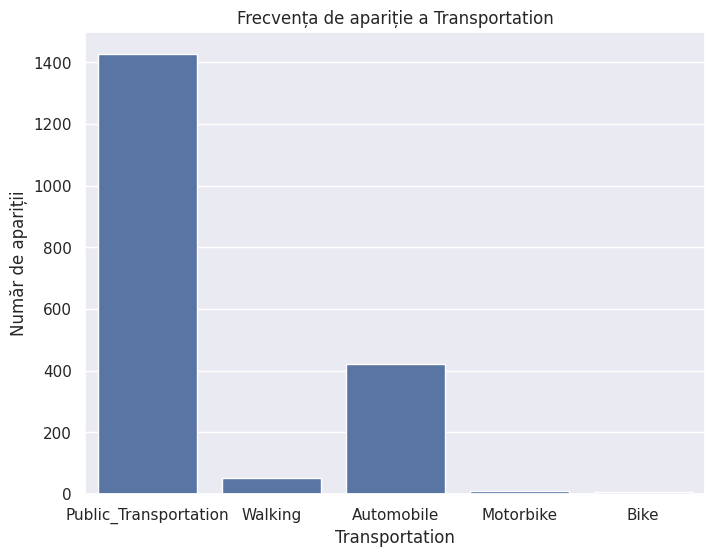

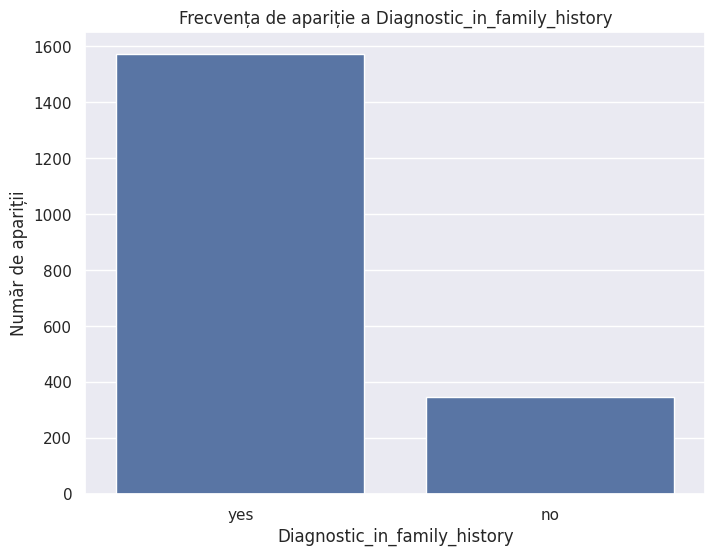

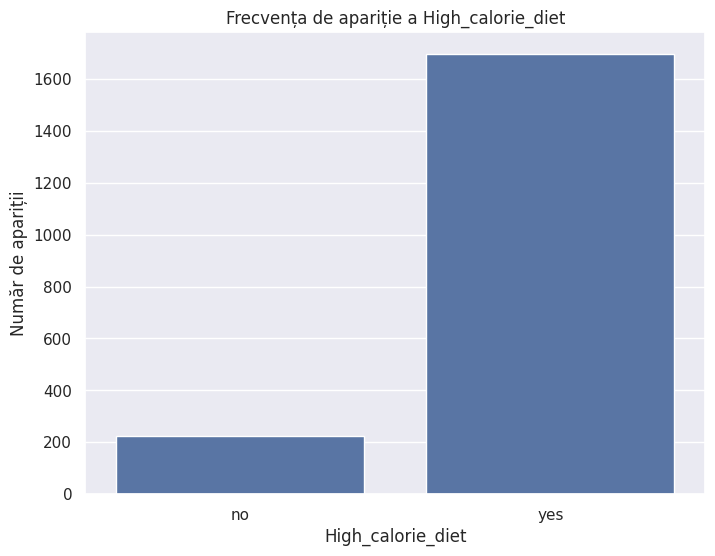

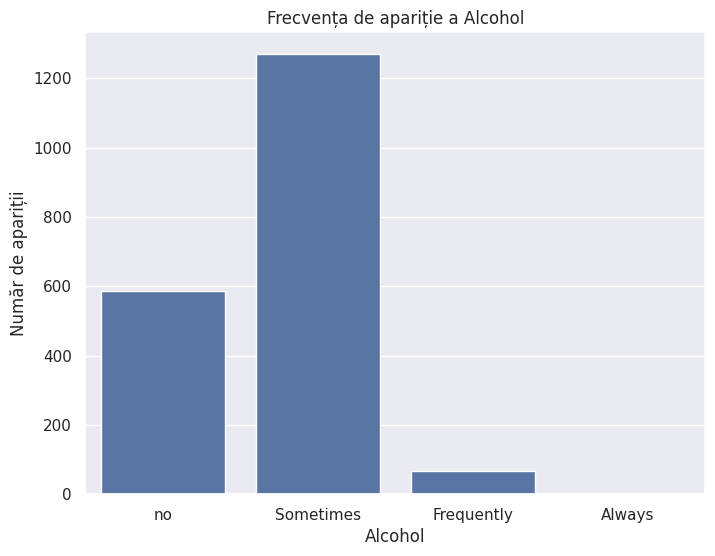

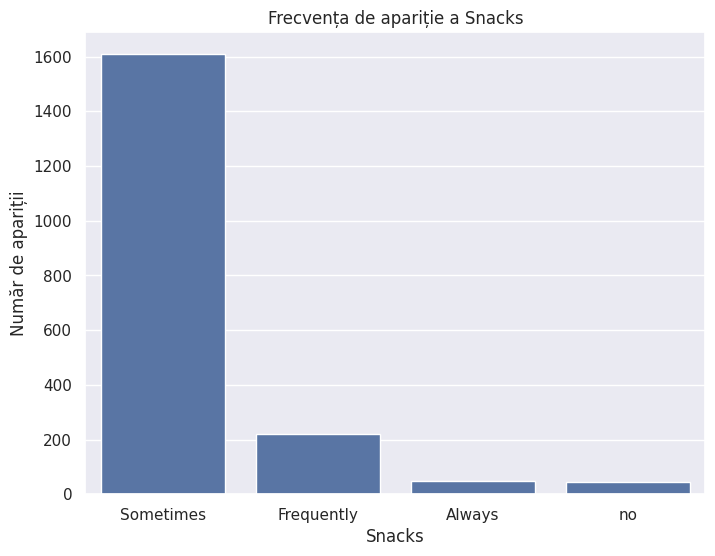

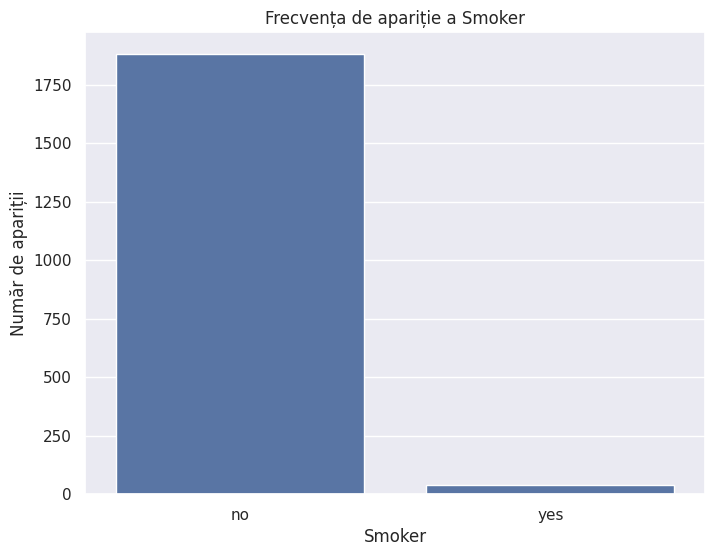

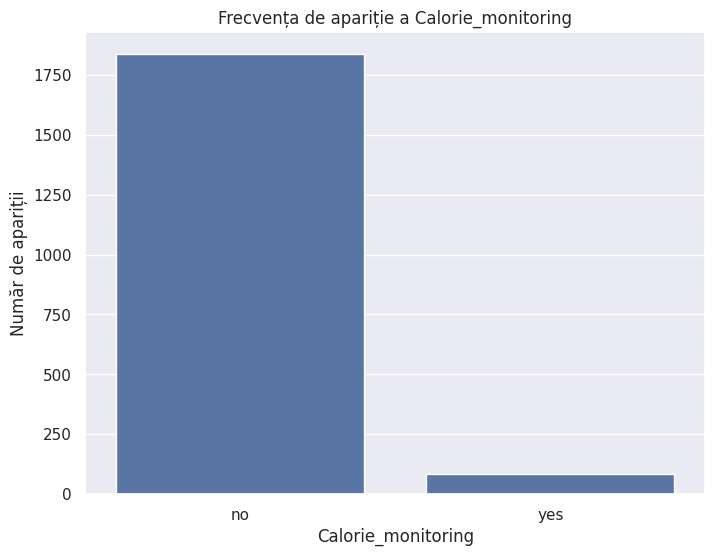

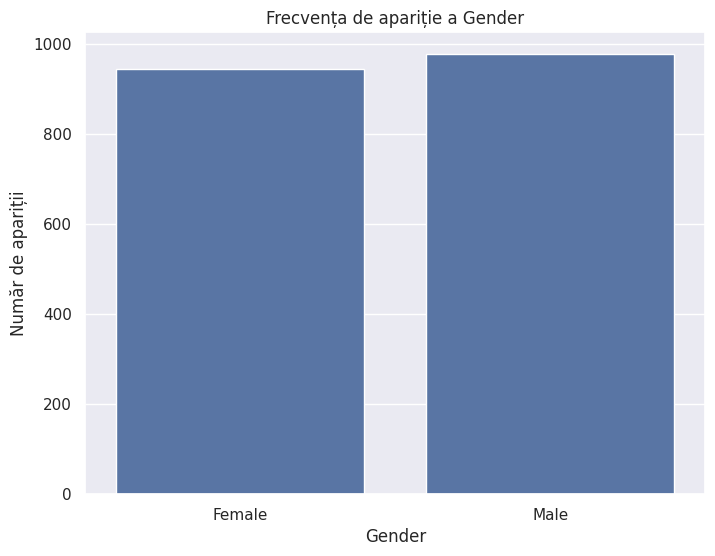

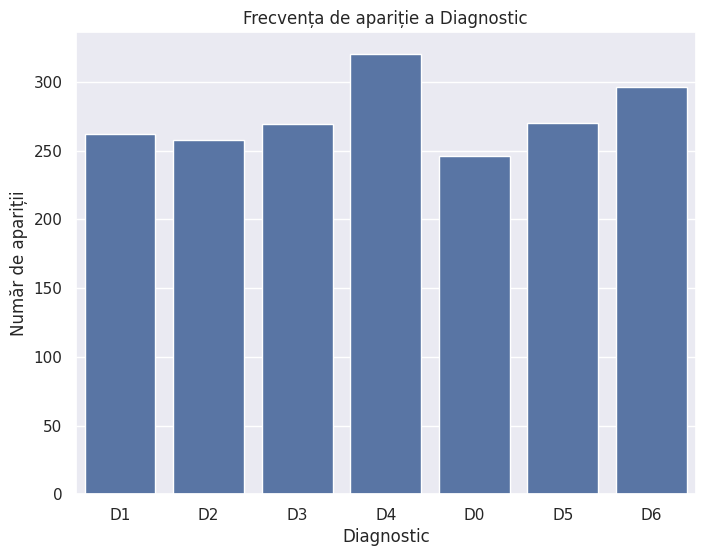

In [ ]:
for column in categorical_attributes:
    plot_categorical_attributes_countplot(df, column)

Analiza echilibrului de clase pentru atributele numerice

In [ ]:
# Afișează o distribuție gaussiană pentru o coloană numerică
def plot_numeric_gaussian_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuția gaussiană a coloanei {column}')
    plt.xlabel(column)
    plt.ylabel('Densitate')
    print(f"{column} has min={df[column].min()} and max={df[column].max()}")
    # Specificăm limitele axei x
    plt.xlim(df[column].min(), df[column].max())

    plt.show()

Eliminam valorile foarte extreme, care impiedica vizualizarea

In [ ]:
OUTLIERS_PERCENT = 1 # Procentul maxim de Outliers admis din total
COEFICIENT_OUTLIERS = 3 # De la ce valoare in sus (COEFICIENT_OUTLIERS * std_dev) consideram un numar ca fiind Outlier

df_copy = eliminate_outliers(df, numeric_attributes, COEFICIENT_OUTLIERS, OUTLIERS_PERCENT)

Outlieri pentru coloana 'Regular_fiber_diet': [2739.0]
Diferența față de std dev pentru outlieri: [2676.5603825004314]
Limita pentru coloana 'Regular_fiber_diet' este valoarea 187.3188524987052

Outlieri pentru coloana 'Sedentary_hours_daily': [956.58]
Diferența față de std dev pentru outlieri: [934.8145156796575]
Limita pentru coloana 'Sedentary_hours_daily' este valoarea 65.29645296102771

Outlieri pentru coloana 'Age': [19627.0, 19685.0]
Diferența față de std dev pentru outlieri: [18993.35855044086, 19051.35855044086]
Limita pentru coloana 'Age' este valoarea 1900.9243486774217

Outlieri pentru coloana 'Est_avg_calorie_intake': []
Diferența față de std dev pentru outlieri: []
Limita pentru coloana 'Est_avg_calorie_intake' este valoarea 3038.709888141891

Outlieri pentru coloana 'Main_meals_daily': []
Diferența față de std dev pentru outlieri: []
Limita pentru coloana 'Main_meals_daily' este valoarea 4.673272004393935

Outlieri pentru coloana 'Height': [1683.0, 1915.0]
Diferența față

Regular_fiber_diet has min=1.0 and max=3.0


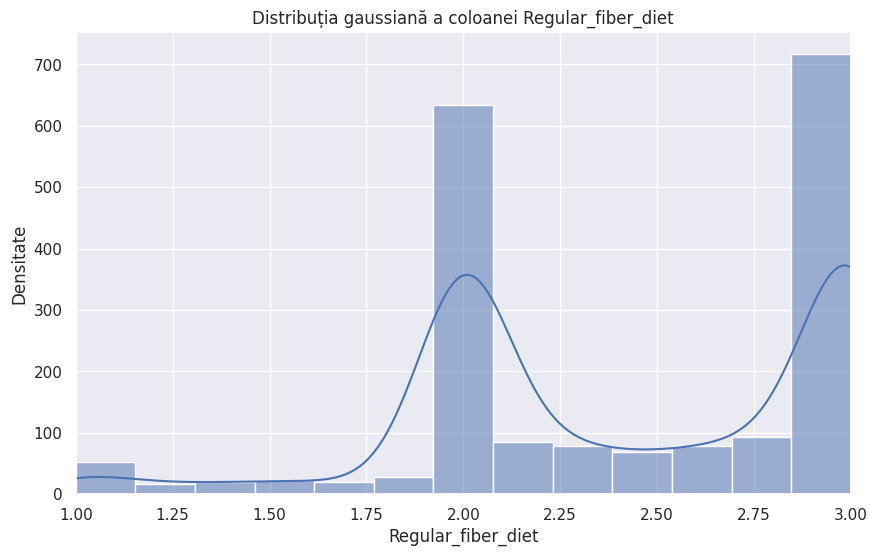

Sedentary_hours_daily has min=2.21 and max=4.67


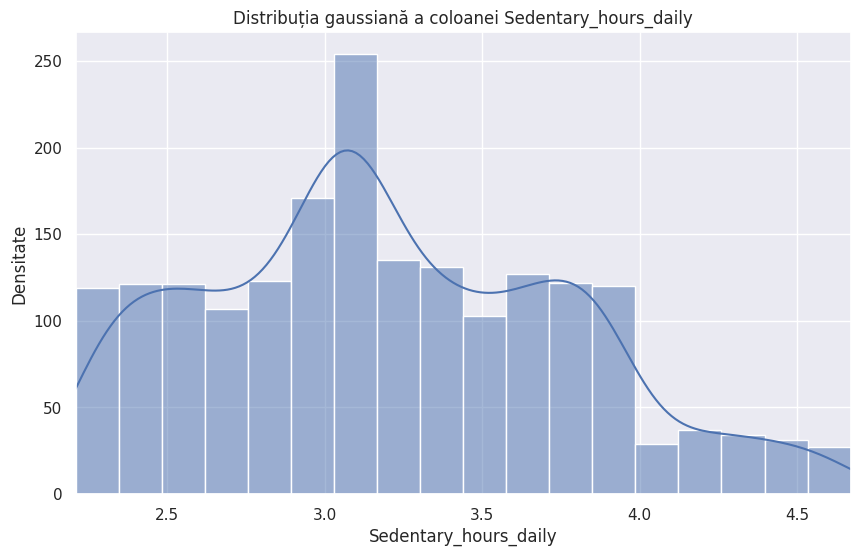

Age has min=15.0 and max=61.0


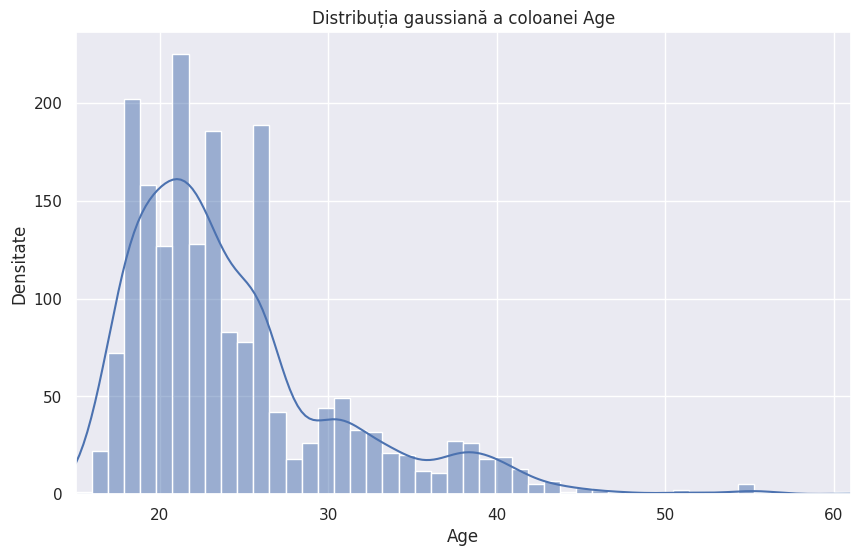

Est_avg_calorie_intake has min=1500 and max=3000


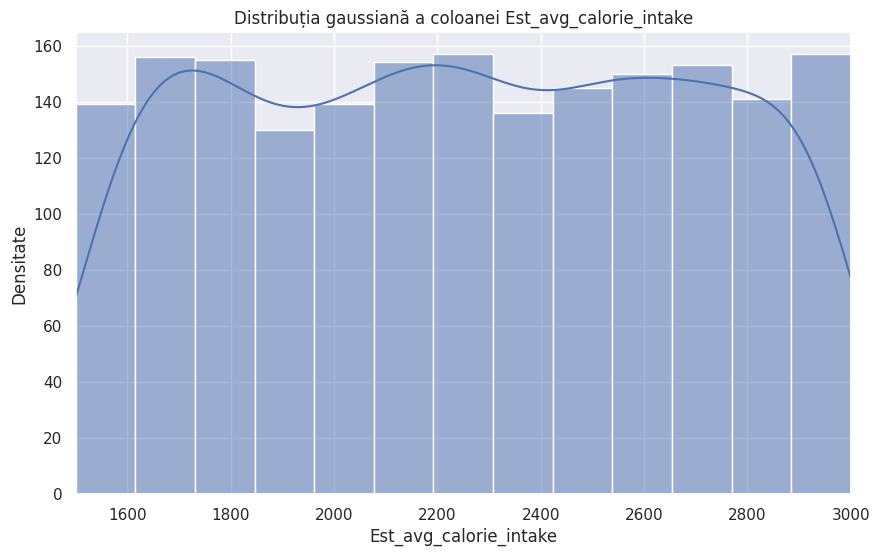

Main_meals_daily has min=1.0 and max=4.0


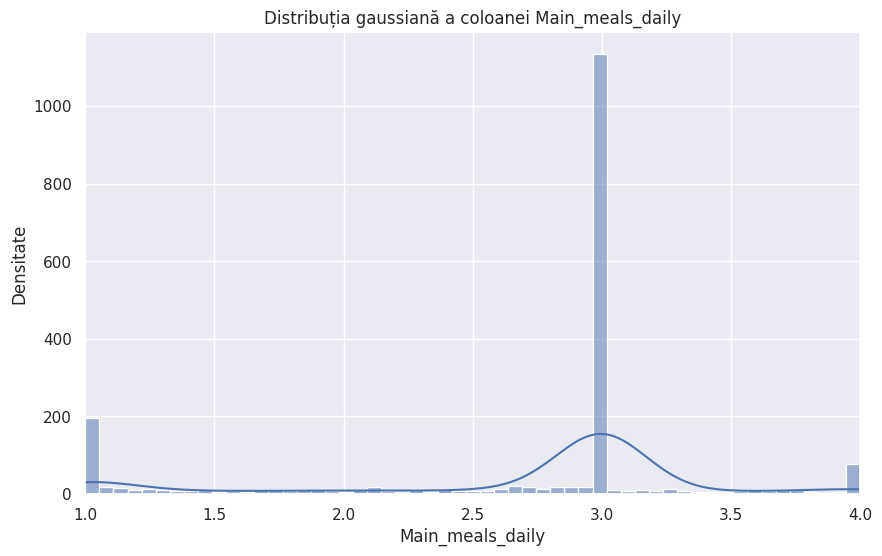

Height has min=1.45 and max=1.98


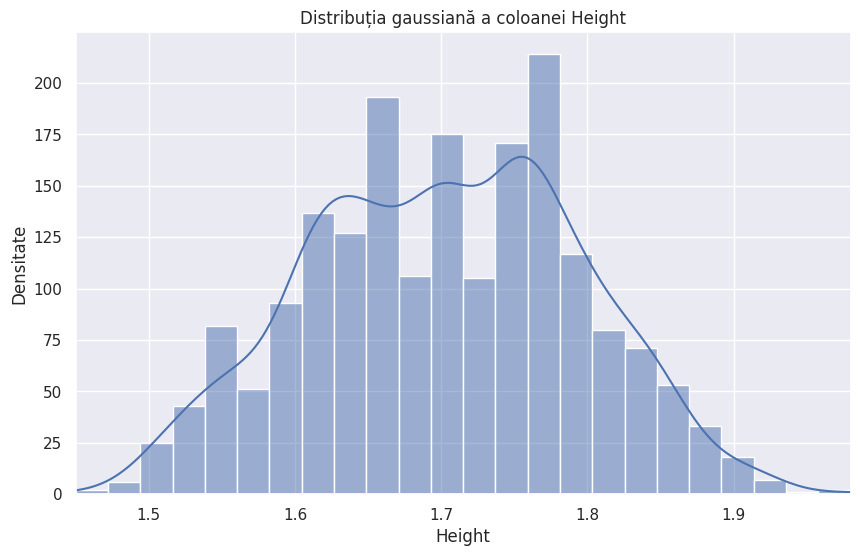

Water_daily has min=1.0 and max=3.0


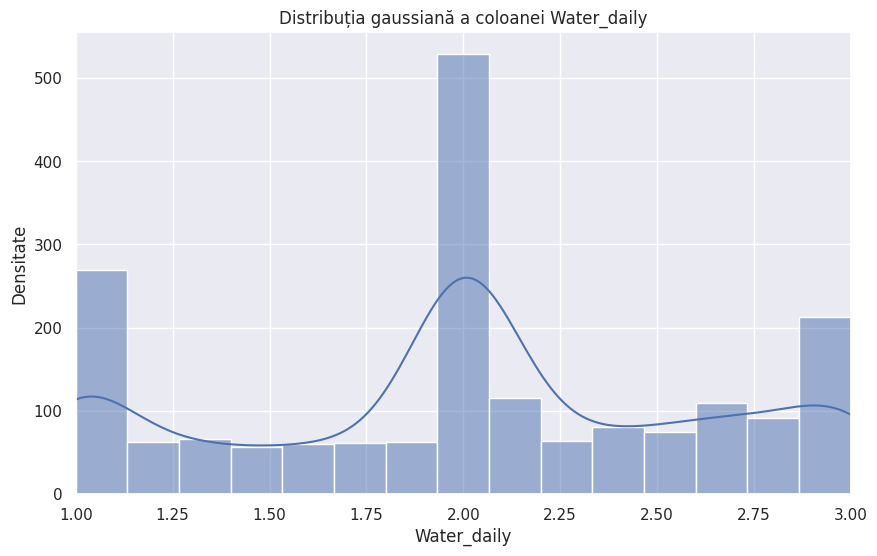

Weight has min=-1.0 and max=165.057269


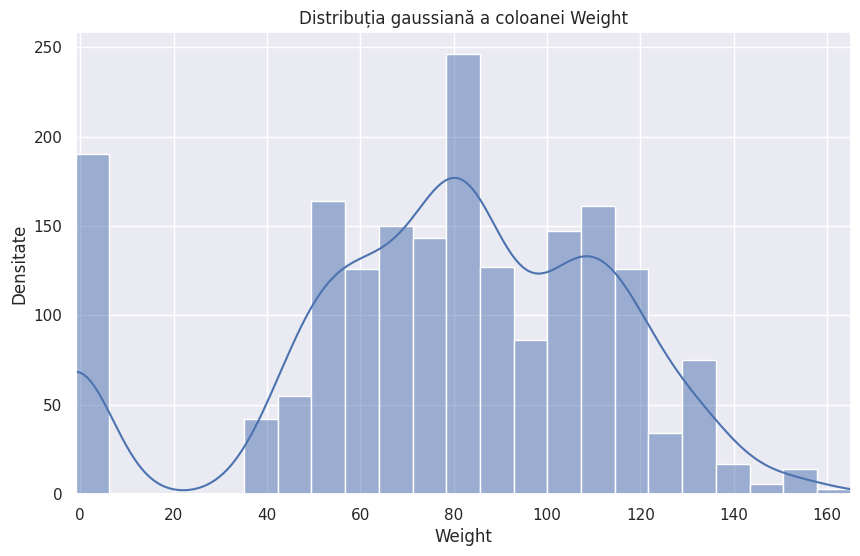

Physical_activity_level has min=0.0 and max=3.0


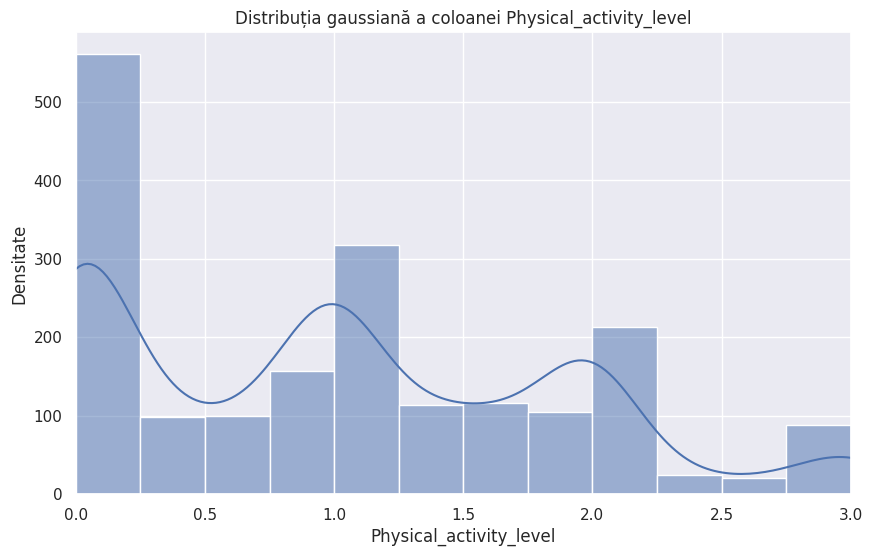

Technology_time_use has min=0 and max=2


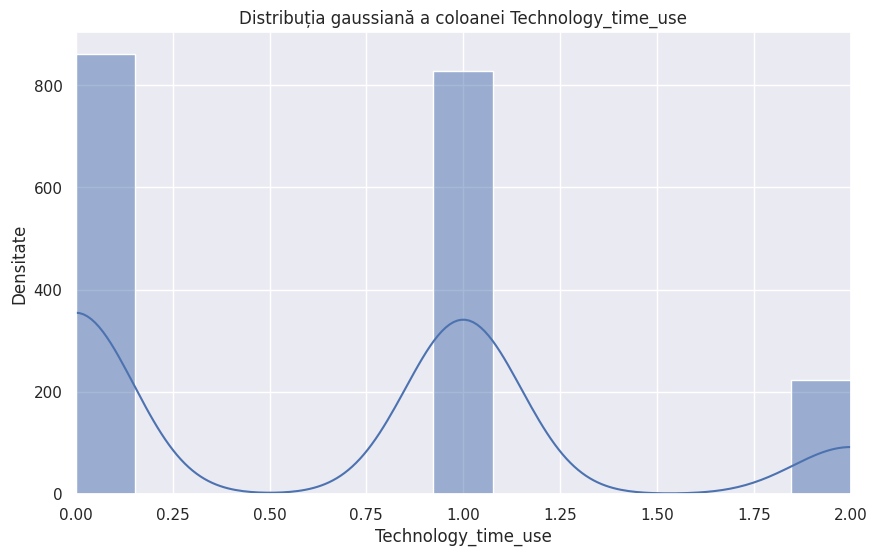

In [ ]:
for column in numeric_attributes:
    plot_numeric_gaussian_distribution(df_copy, column)

# 2. Vizualizarea datelor

Pentru analiza atributelor numerice:

In [ ]:
def calculate_mad(series):
    mean = series.mean()
    absolute_deviations = abs(series - mean)
    mad = absolute_deviations.mean()
    return mad


In [ ]:
def analyze_numeric_attributes(df, numeric_attributes):
    statistics_dict = {}
    for column in numeric_attributes:
        column_statistics = {
            'Medie': df[column].mean(),
            'Abaterea standard': df[column].std(),
            'Abaterea medie absolută': calculate_mad(df[column]),
            'Valoare minimă': df[column].min(),
            'Valoare maximă': df[column].max(),
            'Diferența de valori maxime și minime': df[column].max() - df[column].min(),
            'Mediană': df[column].median(),
            'Abaterea mediană absolută': calculate_mad(abs(df[column] - df[column].median())),
            'Intervalul intercuartil': df[column].quantile(0.75) - df[column].quantile(0.25)
        }
        statistics_dict[column] = column_statistics
    return statistics_dict


Pentru analiza atributelor categorice:

In [ ]:
def analyze_categorical_attributes(column):
    print("\nAnaliză pentru coloana categorică:", column.name)
    print("Valori unice:", column.unique())
    print("\nHistogramă:")
    column.value_counts().plot(kind='bar')
    plt.title('Histograma pentru ' + column.name)
    plt.xlabel(column.name)
    plt.ylabel('Frecvență')
    plt.show()


Pentru analiza de covarianță între atribute:

In [ ]:
def analyze_covariance(df):
    print("\nAnaliză de covarianță între coloanele numerice:")
    covariance_matrix = df.cov()
    print(covariance_matrix)


Pentru analiza de covarianță între atribut și clasă:

In [ ]:
def analyze_covariance_with_class(df, class_column):
    print("\nAnaliză de covarianță între atribute și clasă:")
    for column in df.select_dtypes(include='number').columns:
        covariance_with_class = df[[column, class_column]].cov().iloc[0, 1]
        print(f"Covarianța între '{column}' și '{class_column}' este: {covariance_with_class}")

Analiza pentru atribute numerice

In [ ]:
numeric_statistics = analyze_numeric_attributes(df, numeric_attributes)
for column, statistics in numeric_statistics.items():
    print(f"Analiză pentru coloana numerică '{column}':")
    for statistic, value in statistics.items():
        print(f"{statistic}: {value}")
    print()

Analiză pentru coloana numerică 'Regular_fiber_diet':
Medie: 3.8449373862571576
Abaterea standard: 62.4396174995684
Abaterea medie absolută: 2.8476367127680824
Valoare minimă: 1.0
Valoare maximă: 2739.0
Diferența de valori maxime și minime: 2738.0
Mediană: 2.387426
Abaterea mediană absolută: 2.847173785096963
Intervalul intercuartil: 1.0

Analiză pentru coloana numerică 'Sedentary_hours_daily':
Medie: 3.693571056741281
Abaterea standard: 21.759834908880748
Abaterea medie absolută: 1.1338850443643116
Valoare minimă: 2.21
Valoare maximă: 956.58
Diferența de valori maxime și minime: 954.37
Mediană: 3.13
Abaterea mediană absolută: 1.0310052920662904
Intervalul intercuartil: 0.8700000000000001

Analiză pentru coloana numerică 'Age':
Medie: 44.79250626392504
Abaterea standard: 633.3118370767136
Abaterea medie absolută: 40.94688616864699
Valoare minimă: 15.0
Valoare maximă: 19685.0
Diferența de valori maxime și minime: 19670.0
Mediană: 22.829753
Abaterea mediană absolută: 40.89983783532187
In

Analiza pentru atribute numerice (fara Outlieri foarte extremi)

In [ ]:
discover_negative_nan(df_copy, 'Weight')

numeric_statistics_no_outliers = analyze_numeric_attributes(df_copy, numeric_attributes)
for column, statistics in numeric_statistics_no_outliers.items():
    print(f"Analiză pentru coloana numerică '{column}':")
    for statistic, value in statistics.items():
        print(f"{statistic}: {value}")
    print()

Numărul de valori NaN pentru coloana 'Weight' este: 190
Analiză pentru coloana numerică 'Regular_fiber_diet':
Medie: 2.4208481255230123
Abaterea standard: 0.5337871366466765
Abaterea medie absolută: 0.4787342769428056
Valoare minimă: 1.0
Valoare maximă: 3.0
Diferența de valori maxime și minime: 2.0
Mediană: 2.392422
Abaterea mediană absolută: 0.17269574705012175
Intervalul intercuartil: 1.0

Analiză pentru coloana numerică 'Sedentary_hours_daily':
Medie: 3.196307531380753
Abaterea standard: 0.5753305109633888
Abaterea medie absolută: 0.47045444101118683
Valoare minimă: 2.21
Valoare maximă: 4.67
Diferența de valori maxime și minime: 2.46
Mediană: 3.13
Abaterea mediană absolută: 0.2839333169937501
Intervalul intercuartil: 0.8624999999999998

Analiză pentru coloana numerică 'Age':
Medie: 24.36244938493724
Abaterea standard: 6.414437374618447
Abaterea medie absolută: 4.817102573703191
Valoare minimă: 15.0
Valoare maximă: 61.0
Diferența de valori maxime și minime: 46.0
Mediană: 22.830928999


Analiză pentru coloana categorică: Transportation
Valori unice: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Histogramă:


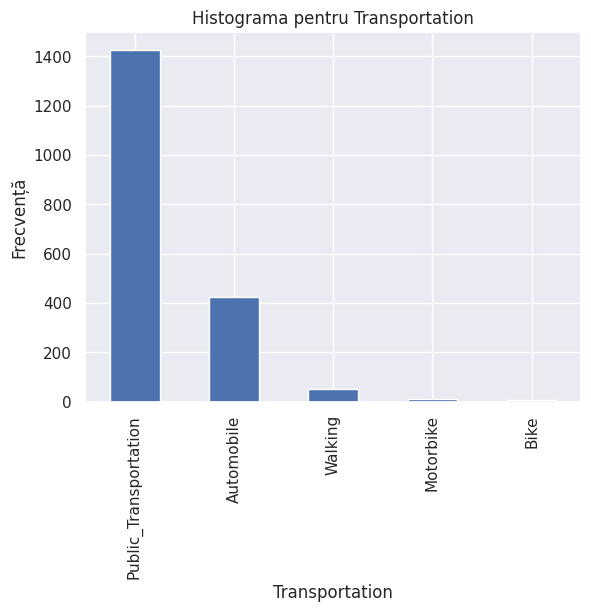


Analiză pentru coloana categorică: Diagnostic_in_family_history
Valori unice: ['yes' 'no']

Histogramă:


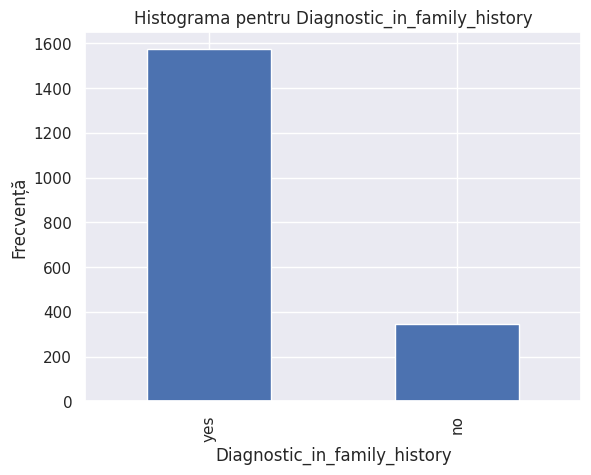


Analiză pentru coloana categorică: High_calorie_diet
Valori unice: ['no' 'yes']

Histogramă:


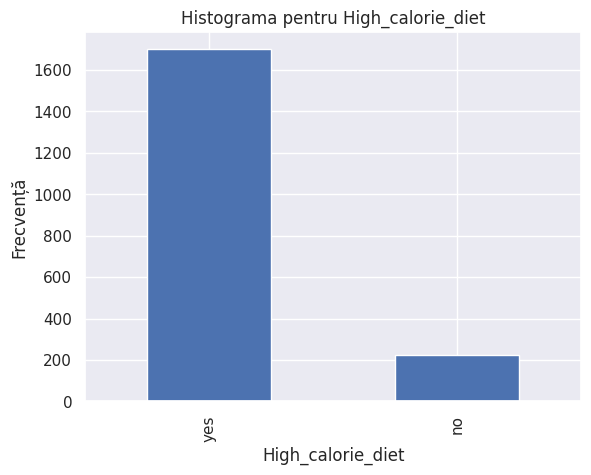


Analiză pentru coloana categorică: Alcohol
Valori unice: ['no' 'Sometimes' 'Frequently' 'Always']

Histogramă:


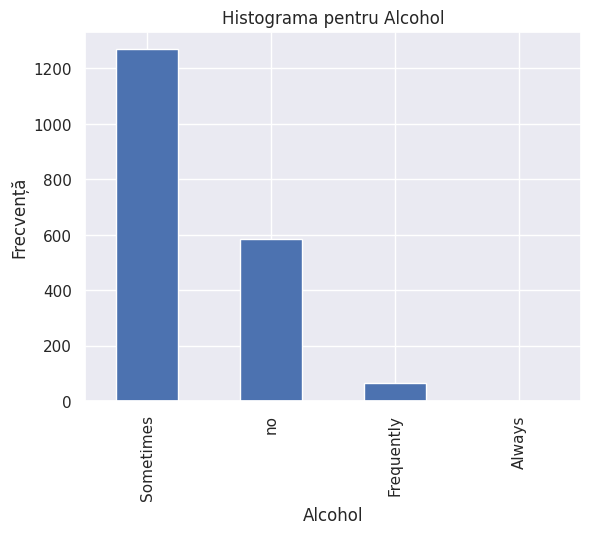


Analiză pentru coloana categorică: Snacks
Valori unice: ['Sometimes' 'Frequently' 'Always' 'no']

Histogramă:


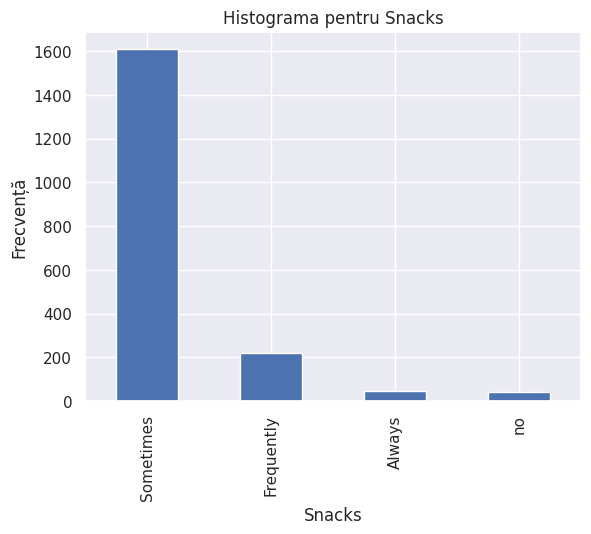


Analiză pentru coloana categorică: Smoker
Valori unice: ['no' 'yes']

Histogramă:


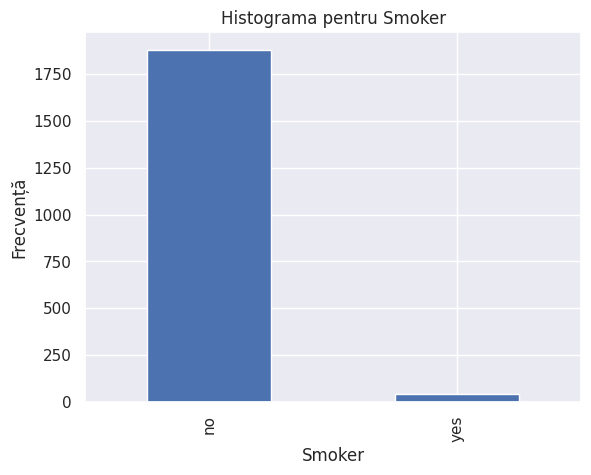


Analiză pentru coloana categorică: Calorie_monitoring
Valori unice: ['no' 'yes']

Histogramă:


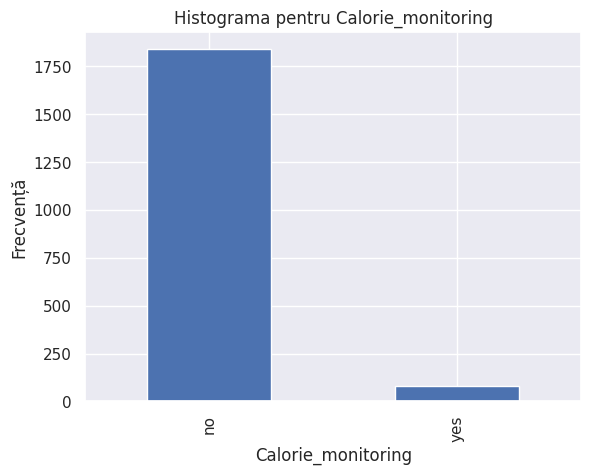


Analiză pentru coloana categorică: Gender
Valori unice: ['Female' 'Male']

Histogramă:


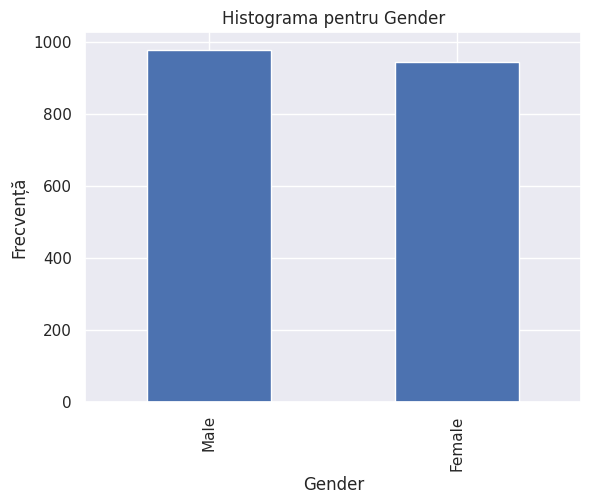


Analiză pentru coloana categorică: Diagnostic
Valori unice: ['D1' 'D2' 'D3' 'D4' 'D0' 'D5' 'D6']

Histogramă:


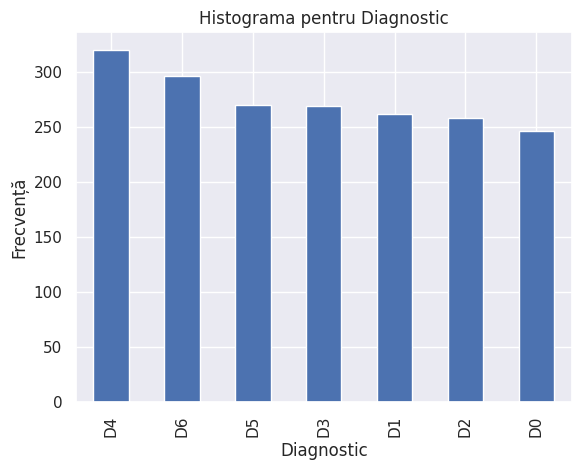

In [ ]:
# Analiza pentru atribute categorice
for column in categorical_attributes:
    analyze_categorical_attributes(df[column])

In [ ]:
# Analiza de covarianță între atribute
analyze_covariance(df[numeric_attributes])


Analiză de covarianță între coloanele numerice:
                         Regular_fiber_diet  Sedentary_hours_daily  \
Regular_fiber_diet              3898.705833              -2.044016   
Sedentary_hours_daily             -2.044016             473.490415   
Age                              -28.298519             -13.086870   
Est_avg_calorie_intake          -411.186479             273.718418   
Main_meals_daily                   0.098487              -0.611959   
Height                            -2.769186              -0.587676   
Water_daily                       -0.239886              -0.071017   
Weight                          -135.811353              19.163702   
Physical_activity_level            0.128235              -0.476095   
Technology_time_use               -2.233738             648.167098   

                                   Age  Est_avg_calorie_intake  \
Regular_fiber_diet          -28.298519             -411.186479   
Sedentary_hours_daily       -13.086870          

In [ ]:
for column in numeric_attributes:
    analyze_covariance_with_class(df, column)


Analiză de covarianță între atribute și clasă:
Covarianța între 'Regular_fiber_diet' și 'Regular_fiber_diet' este: 3898.705833492422
Covarianța între 'Sedentary_hours_daily' și 'Regular_fiber_diet' este: -2.044015582817563
Covarianța între 'Age' și 'Regular_fiber_diet' este: -28.298518550765273
Covarianța între 'Est_avg_calorie_intake' și 'Regular_fiber_diet' este: -411.18647923137803
Covarianța între 'Main_meals_daily' și 'Regular_fiber_diet' este: 0.0984867738584109
Covarianța între 'Height' și 'Regular_fiber_diet' este: -2.769185894926001
Covarianța între 'Water_daily' și 'Regular_fiber_diet' este: -0.23988565297368628
Covarianța între 'Weight' și 'Regular_fiber_diet' este: -135.81135328527245
Covarianța între 'Physical_activity_level' și 'Regular_fiber_diet' este: 0.12823549479193194
Covarianța între 'Technology_time_use' și 'Regular_fiber_diet' este: -2.2337384674347556

Analiză de covarianță între atribute și clasă:
Covarianța între 'Regular_fiber_diet' și 'Sedentary_hours_daily

## Concluzii EDA

- Scaler:
  Este necesar deoarece atributele au valori foarte diferite, unele in intervalul [0-3], altele [1-2], altele [60-160] etc.

- Valori lipsa:
  Vom trata valorile lipsa ale lui Weight (aproximativ 10% din total)

- Selectie features:
  Dupa cum am analizat anterior valorile p-values obtinute pentru fiecare atribut, am constatat care dintre acestea sunt relevante pentru a atinge target-ul. Astfel le vom folosi doar pe acele pentru partea de invatare

- Modele de invatare:
  Evident ca vom utiliza mai multe modele de invatare cu configuratii diferite, pentru a putea realiza o concluzie clara asupra performantelor acestora si a determina metoda de analiza cea mai eficienta

- Evaluarea algoritmului:
  Vom utiliza diferite metrici, in special Accuracy-ul obtinut dar ne vom orienta si dupa celelalte metrici, mai ales cand o sa avem rezultate asemanatoare intre diversi algoritmi propusi

#3.2. Extragerea manuală a atributelor și utilizarea algoritmilor clasici de Învățare Automată

Importam setul de date si il pre-procesam

In [ ]:
# Plecam de la setul de date original
df = pd.read_csv(f"{DATASET_PATH}/date_tema_1_iaut_2024.csv")

# Convertim atributele categorice in numerice
convert_categorical_to_numeric(df)

# Specificam coloana target
target_column = "Diagnostic"

Atributele categorice convertite cu succes în numere:
['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight', 'Physical_activity_level']


Definim o functie care permite utilizarea de configuratii diferite pentru analiza si prelucrarea setului de date

In [ ]:
def preprocess_data(df, target_column, scaler, imputer, encoder):
    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Separate numeric and non-numeric columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns

    # Iterate over non-numeric columns
    for column in non_numeric_cols:
        # Treat the boolean variables by encoding them to 0 / 1
        if X[column].nunique() == 2:
            X[column] = X[column].replace({"yes": 1, "no": 0})
            non_numeric_cols = non_numeric_cols.drop(column)

    # Impute missing values for numeric columns
    imputed_data = imputer.fit_transform(X[numeric_cols])
    X_imputed = pd.DataFrame(imputed_data, columns=numeric_cols)

    # Encode non-numeric columns
    encoder.fit(X[non_numeric_cols])
    encoded_data = encoder.transform(X[non_numeric_cols])
    encoded_cols = encoder.get_feature_names_out(non_numeric_cols)
    X_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)

    # Concatenate numeric and encoded categorical data
    X_final = pd.concat([X_imputed, X_encoded], axis=1)

    # Standardize numeric features
    X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)

    return X_scaled, y

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred).round(3)
    precision = precision_score(y_test, y_pred, average=None).round(3)
    recall = recall_score(y_test, y_pred, average=None).round(3)
    f1 = f1_score(y_test, y_pred, average=None).round(3)

    return accuracy, precision, recall, f1

def get_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    return cm

def run_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    return best_params, best_model

def classify_data(df, target_column, scaler, imputer, encoder, selector, classifier, param_grid, test_size=0.2):
    # Preprocesare date
    X, y = preprocess_data(df, target_column, scaler, imputer, encoder)

    # Selectare caracteristici
    X_selected = selector.fit_transform(X, y)

    # Împărțire date în seturi de antrenare și testare
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size)

    # Căutare hiperparametri
    best_params, best_model = run_grid_search(classifier, param_grid, X_train, y_train)

    # Evaluare model
    accuracy, precision, recall, f1 = evaluate_model(best_model, X_test, y_test)

    # Matrice de confuzie
    confusion_matrix = get_confusion_matrix(best_model, X_test, y_test)

    return {
        "Best Parameters": best_params,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Confusion Matrix": confusion_matrix
    }

Cream o functie care primeste detaliile configuratiei si executa clasificarea

In [ ]:
def compare_classify_configurations(df, target_column, scalers, imputers, encoders, selectors, classifiers, param_grids):
    all_results = {}

    total_configurations = len(scalers) * len(imputers) * len(encoders) * len(selectors) * len(classifiers)
    configuration_count = 0

    # Iterate over all combinations of pre-processors and classifiers
    for scaler_name, scaler in scalers.items():
        for imputer_name, imputer in imputers.items():
            for encoder_name, encoder in encoders.items():
                for selector_name, selector in selectors.items():
                    for classifier_name, classifier in classifiers.items():
                        param_grid = param_grids[classifier_name]

                        # Incrementăm numărul configurației testate
                        configuration_count += 1

                        # Construim numele configurației
                        config_name = f"{scaler_name}_{imputer_name}_{encoder_name}_{selector_name}_{classifier_name}"

                        # Afisăm progresul
                        print(f"Testing configuration {configuration_count}/{total_configurations}: {config_name}")

                        start_time = time.time()
                        result = classify_data(df.copy(), target_column, scaler, imputer, encoder, selector, classifier, param_grid)
                        end_time = time.time()

                        execution_time = end_time - start_time
                        print(f"Duration: {execution_time} seconds")

                        # Salvăm rezultatele pentru configurația curentă
                        all_results[(scaler_name, imputer_name, encoder_name, selector_name, classifier_name)] = {
                            "Configuration": config_name,
                            "Results": result,
                            "Duration": round(execution_time, 3)
                        }

    return all_results

### Analiza comparativa

Definim scalerii utilizati pentru standardizare

In [ ]:
scalers = {
    "MinMaxScaler": MinMaxScaler()
}

Definim imputers utilizati pentru tratarea valorilor lipsa

In [ ]:
imputers = {
    "SimpleImputer_median": SimpleImputer(strategy='median'),
    "IterativeImputer": IterativeImputer()
}

Definim encoders utilizati pentru tratarea atributelor categorice

In [ ]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, custom_mappings=None):
        self.custom_mappings = custom_mappings
        self.encoders = {}

    def fit(self, X, y=None):
        for column in X.columns:
            if column in self.custom_mappings:
                ordinal_encoder = OrdinalEncoder(categories=[list(self.custom_mappings[column].keys())])
            else:
                ordinal_encoder = OrdinalEncoder()
            ordinal_encoder.fit(X[[column]])
            self.encoders[column] = ordinal_encoder
        return self

    def transform(self, X):
        encoded_data = X.copy()
        for column, encoder in self.encoders.items():
            encoded_data[column] = encoder.transform(X[[column]])
        return encoded_data

    def get_feature_names_out(self, input_features):
        for feature in input_features:
            if feature not in self.custom_mappings:
                print(f"Feature {feature} has no rule for encoding set")
        return input_features

Definim cum tratam din punct de vedere ordinal coloanele

In [ ]:
# Define custom mappings for ordinal columns
custom_mappings = {
    "Transportation": {"Walking": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Automobile": 4},
    "Alcohol": {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3},
    "Snacks": {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3},
    "Diagnostic": {"D0": 0, "D1": 1, "D2": 2, "D3": 3, "D4": 4, "D5": 5, "D6": 6}
}

In [ ]:
encoders = {
    "CountEncoder": ce.CountEncoder(),
    "CustomOrdinalEncoder" : CustomOrdinalEncoder(custom_mappings)
}

Definim selectors utilizati pentru selectarea feature-urilor

In [ ]:
selectors = {
    "VarianceThreshold": VarianceThreshold(),
    "SelectPercentile": SelectPercentile(percentile=50),
}

Definim clasificatorii utilizati

In [ ]:
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

Definim hiper-parametrii pentru fiecare clasificator

In [ ]:
param_grids = {
    "RandomForestClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20],
        "max_features": [0.5, 0.75, 1.0]
    },
    "ExtraTreesClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20],
        "max_features": [0.5, 0.75, 1.0]
    },
    "SVC": {
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "C": [0.1, 1, 10]
    },
    "GradientBoostingClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.5]
    }
}

In [ ]:
try:
    results = compare_classify_configurations(df, target_column, scalers, imputers, encoders, selectors, classifiers, param_grids)
except Exception as e:
    # Print the traceback if an exception occurs
    traceback.print_exc()

results_list = list(results.items())

# Sort the list descending by Accuracy
sorted_results = sorted(results_list, key=lambda x: x[1]['Results']['Accuracy'], reverse=True)

Testing configuration 1/32: MinMaxScaler_SimpleImputer_median_CountEncoder_VarianceThreshold_RandomForestClassifier
Duration: 35.84983706474304 seconds
Testing configuration 2/32: MinMaxScaler_SimpleImputer_median_CountEncoder_VarianceThreshold_ExtraTreesClassifier
Duration: 19.954594612121582 seconds
Testing configuration 3/32: MinMaxScaler_SimpleImputer_median_CountEncoder_VarianceThreshold_SVC
Duration: 8.176246404647827 seconds
Testing configuration 4/32: MinMaxScaler_SimpleImputer_median_CountEncoder_VarianceThreshold_GradientBoostingClassifier
Duration: 279.15648317337036 seconds
Testing configuration 5/32: MinMaxScaler_SimpleImputer_median_CountEncoder_SelectPercentile_RandomForestClassifier
Duration: 23.647466897964478 seconds
Testing configuration 6/32: MinMaxScaler_SimpleImputer_median_CountEncoder_SelectPercentile_ExtraTreesClassifier
Duration: 15.439836740493774 seconds
Testing configuration 7/32: MinMaxScaler_SimpleImputer_median_CountEncoder_SelectPercentile_SVC
Duration:

Afișarea rezultatelor sortate

In [ ]:
for index, details in enumerate(sorted_results):
    config = details[0]
    result = details[1]["Results"]
    duration = details[1]["Duration"]
    print(f"Configuration: {config}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1: {result['F1']}")
    print(f"Duration (s): {duration}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 150)

Configuration: ('MinMaxScaler', 'IterativeImputer', 'CountEncoder', 'VarianceThreshold', 'GradientBoostingClassifier')
Accuracy: 0.943
Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Precision: [0.94  0.867 0.942 0.946 0.953 0.979 0.982]
Recall: [0.959 0.929 0.86  0.946 0.953 0.979 0.982]
F1: [0.949 0.897 0.899 0.946 0.953 0.979 0.982]
Duration (s): 275.552
Confusion Matrix:
[[47  1  1  0  0  0  0]
 [ 2 52  0  0  1  0  1]
 [ 0  5 49  2  1  0  0]
 [ 0  1  1 53  1  0  0]
 [ 0  1  1  0 61  1  0]
 [ 0  0  0  1  0 47  0]
 [ 1  0  0  0  0  0 54]]
------------------------------------------------------------------------------------------------------------------------------------------------------
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CustomOrdinalEncoder', 'VarianceThreshold', 'RandomForestClassifier')
Accuracy: 0.938
Best Parameters: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 100}
Precision: [0.944 0.82  0.941 0.981 0.958 0.947 0.955]
Re

Salvam Top 5 configuratii separat

In [ ]:
top_5_configurations = {}

for index, details in enumerate(sorted_results):
    if index < 5:
        config = details[0]
        result = details[1]["Results"]
        duration = details[1]["Duration"]

        top_5_configurations[config] = {
            "Accuracy": result['Accuracy'],
            "Best Parameters": result['Best Parameters'],
            "Precision": result['Precision'],
            "Recall": result['Recall'],
            "F1": result['F1'],
            "Duration": duration,
            "Confusion Matrix": result['Confusion Matrix']
        }

Rulam cele 5 configuratii de mai multe ori

In [ ]:
# Dictionary to store results run multiple times for each configuration in the top 5
results_for_top_5_configurations = {}

# Number of runs for each configuration
num_runs = 3

# Iterate over each configuration from the top 5
for config, details in top_5_configurations.items():
    # Initialize a list to store results for this configuration
    results_for_this_config = []

    scaler = scalers[config[0]]  # Get the scaler using the corresponding key from the configuration
    imputer = imputers[config[1]]  # Get the imputer using the corresponding key from the configuration
    encoder = encoders[config[2]]  # Get the encoder using the corresponding key from the configuration
    selector = selectors[config[3]]  # Get the selector using the corresponding key from the configuration
    classifier = classifiers[config[4]]  # Get the classifier using the corresponding key from the configuration
    param_grid = param_grids[config[4]]  # Get the parameter grid for the current classifier

    # Iterate over the specified number of runs for this configuration
    for run in range(num_runs):
        try:
          print(f"Configuration: {config} Run {run + 1} / {num_runs}")
          result = classify_data(df.copy().sample(frac=1).reset_index(drop=True), target_column, scaler, imputer, encoder, selector, classifier, param_grid)
        except Exception as e:
          # Print the traceback if an exception occurs
          traceback.print_exc()

        # Add the results to the list for this configuration
        results_for_this_config.append(result)

    # Add the list of results for this configuration to the final dictionary
    results_for_top_5_configurations[config] = results_for_this_config

Configuration: ('MinMaxScaler', 'IterativeImputer', 'CountEncoder', 'VarianceThreshold', 'GradientBoostingClassifier') Run 1 / 3
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CountEncoder', 'VarianceThreshold', 'GradientBoostingClassifier') Run 2 / 3
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CountEncoder', 'VarianceThreshold', 'GradientBoostingClassifier') Run 3 / 3
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CustomOrdinalEncoder', 'VarianceThreshold', 'RandomForestClassifier') Run 1 / 3
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CustomOrdinalEncoder', 'VarianceThreshold', 'RandomForestClassifier') Run 2 / 3
Configuration: ('MinMaxScaler', 'IterativeImputer', 'CustomOrdinalEncoder', 'VarianceThreshold', 'RandomForestClassifier') Run 3 / 3
Configuration: ('MinMaxScaler', 'SimpleImputer_median', 'CountEncoder', 'VarianceThreshold', 'GradientBoostingClassifier') Run 1 / 3
Configuration: ('MinMaxScaler', 'SimpleImputer_median', 'CountEncoder', 'Variance

KeyError: 'Results'

Display the results for each configuration from the top 5

In [1]:
for config, results in results_for_top_5_configurations.items():
    print(f"Results for configuration: {config}")
    for i, result in enumerate(results):
        print(f"Run {i + 1}:")
        print(f"Accuracy: {result['Results']['Accuracy']}")
        print(f"Best Parameters: {result['Results']['Best Parameters']}")
        print(f"Precision: {result['Results']['Precision']}")
        print(f"Recall: {result['Results']['Recall']}")
        print(f"F1: {result['Results']['F1']}")
        print(f"Confusion Matrix:\n{result['Results']['Confusion Matrix']}")
        print("-" * 50)

NameError: name 'results_for_top_5_configurations' is not defined